In [1]:
!pip install nltk


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)


In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
df = pd.read_csv(
    '/content/IMDB Dataset.csv',
    engine='python',
    encoding='utf-8'
)

df.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(preprocess_text)


In [8]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [9]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
vectorizer = CountVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)


MultinomialNB()

In [12]:
y_pred = nb.predict(X_test_vec)
y_prob = nb.predict_proba(X_test_vec)[:, 1]


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8494


In [14]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.8549326903757284
Recall: 0.8444135741218496
F1 Score: 0.8496405750798722


In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[4239  722]
 [ 784 4255]]


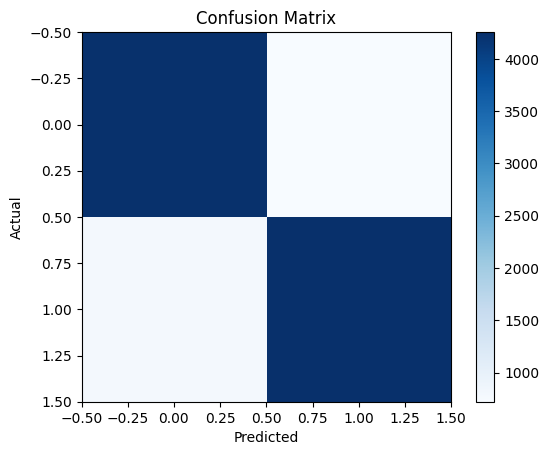

In [17]:
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [18]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.912517937591323


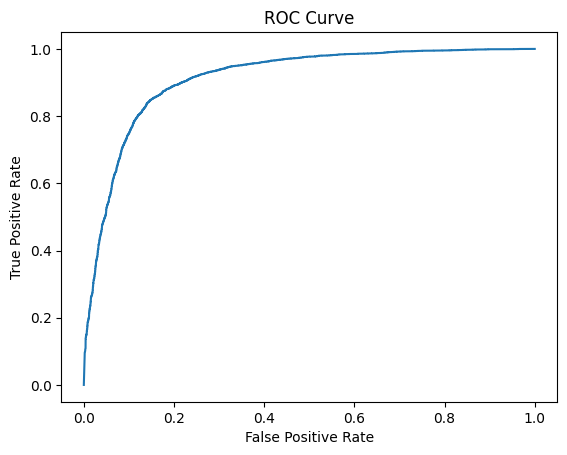

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [20]:
#Exercise2
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [21]:
X.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
X.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=5000)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=5)

In [25]:
selected_features = X.columns[rfe.support_]
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print("Top 5 Selected Features:")
print(selected_features)


Top 5 Selected Features:
Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


In [26]:
feature_ranking.head(10)


,Feature,Ranking
0,mean radius,1
11,texture error,1
25,worst compactness,1
20,worst radius,1
26,worst concavity,1
28,worst symmetry,2
6,mean concavity,3
27,worst concave points,4
5,mean compactness,5
24,worst smoothness,6


In [27]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)
y_prob_sel = model.predict_proba(X_test_sel)[:, 1]


In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1 Score:", f1_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sel))


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC-AUC: 0.9983622666229938


In [29]:
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
y_prob_all = model.predict_proba(X_test)[:, 1]

print("All Features ROC-AUC:", roc_auc_score(y_test, y_prob_all))
print("Selected Features ROC-AUC:", roc_auc_score(y_test, y_prob_sel))


All Features ROC-AUC: 0.9977071732721913
Selected Features ROC-AUC: 0.9983622666229938


In [30]:
for n in [3, 7]:
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)

    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    model.fit(X_train_rfe, y_train)
    preds = model.predict(X_test_rfe)

    print(f"\nTop {n} Features:")
    print("F1 Score:", f1_score(y_test, preds))



Top 3 Features:
F1 Score: 0.8607594936708861

Top 7 Features:
F1 Score: 0.9790209790209791
